Andres Felipe Herrera Moreno - 1710150

Santiago Rodríguez Penagos - 1670706

In [1]:
conda install 'tensorflow=*=mkl*'

Solving environment: done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics

# Remove deprecated warnings
import warnings
warnings.filterwarnings('ignore')

# Import Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier 
# Import train_test_split function
from sklearn.model_selection import train_test_split 
# Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB
# Import Neural Network Classifier
from sklearn.neural_network import MLPClassifier
# Import TensorFlow
import tensorflow as tf

Description of fields:

* age: age in years

* sex: (1 = male; 0 = female)

* cp: chest pain type

* trestbps: resting blood pressure (in mm Hg on admission to the hospital)

* chol: serum cholestoral in mg/dl

* fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

* restecg: resting electrocardiographic results

* thalach: maximum heart rate achieved

* exang: exercise induced angina (1 = yes; 0 = no)

* oldpeak: ST depression induced by exercise relative to rest

* slope: the slope of the peak exercise ST segment

* ca: number of major vessels (0-3) colored by flourosopy

* thal: 3 = normal; 6 = fixed defect; 7 = reversable defect

* target: 1 or 0

In [3]:
# Load training model
trainx=pd.read_csv("./data/heart.csv")

# Show matrix head 
trainx.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
# Show matrix description
trainx.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [5]:
# The matrix is transposed to facilitate data processing
trainx.values.resize(trainx.shape[1], trainx.shape[0])

# Print transpose
trainx.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


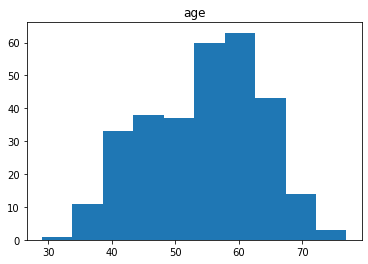

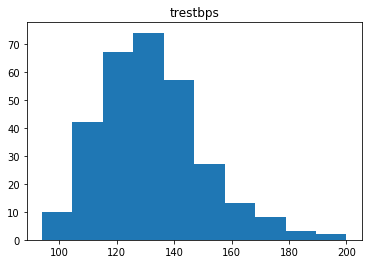

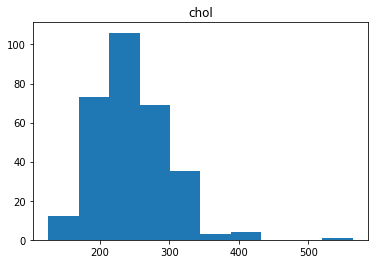

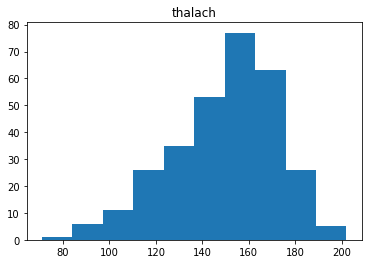

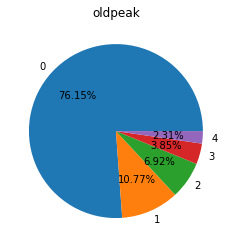

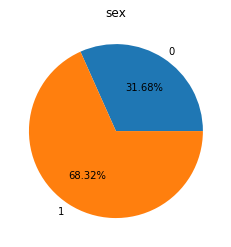

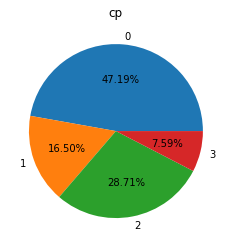

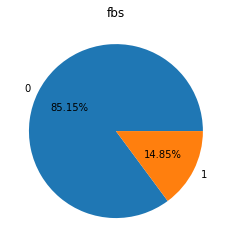

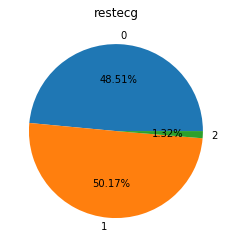

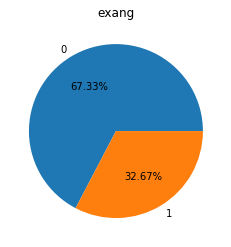

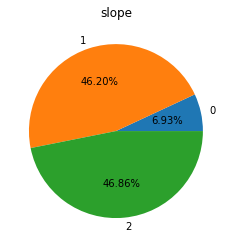

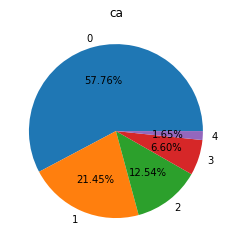

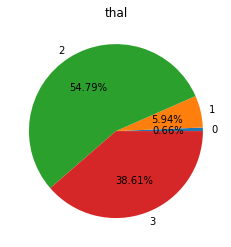

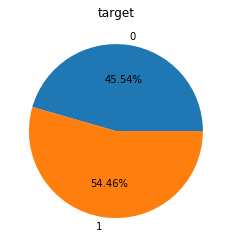

In [6]:
#  Get labels of values greater than zero
def get_new_labels(sizes, labels):
    new_labels = [label if size > 0 else '' for size, label in zip(sizes, labels)]
    return new_labels

# Get percentage values greater than zero
def autopct_generator():
    def inner_autopct(pct):
        return ('%.2f%%' % pct) if pct > 0 else ''
    return inner_autopct

avaliable_columns = ["age", "trestbps", "chol", "thalach", "oldpeak", "sex", "cp", "fbs", "restecg", "exang", "slope", "ca", "thal"]

# Draw histograms charts
for i in avaliable_columns[:4]:
    plt.title(i)
    plt.hist(trainx[i])
    plt.show()

# Drawing pie charts
for i in avaliable_columns[4:] + ["target"]:
    temp = [0] * 6
    labels = range(0, 6)
    
    # Add present values
    for j in labels:
        temp[j] = (trainx[i] == j).sum()
        
    plt.title(i)
    plt.pie(temp, labels=get_new_labels(temp, labels), autopct=autopct_generator(),)
    plt.show()

In [7]:
# Get all column exclude "target"
X = trainx[avaliable_columns]

# 80% training and 20% test
X_train, X_test, y_train, y_test = train_test_split(X, trainx["target"], test_size=0.2, random_state=1) 

If the 90% training set increases the accuracy in all methods quite a bit, but this may be because there is a smaller set of tests.

In [8]:
# Create Decision Tree Classifer object
dtc = DecisionTreeClassifier()

# Train Decision Tree Classifer
dtc.fit(X_train,y_train)

# Predict the response for test dataset
y_pred = dtc.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7377049180327869


In [9]:
metrics.confusion_matrix(y_test, np.argmax(y_pred, axis=1))

(61,)
(61,)


AxisError: axis 1 is out of bounds for array of dimension 1

Decision Tree

A very fast algorithm but with the lowest and most variable accuracy of all methods.

In [ ]:
# Create a Gaussian Naive Bayes object
gnb = GaussianNB()

# Train Gaussian Naive Bayes
gnb.fit(X_train, y_train)

# Predict the response for test dataset
y_pred = gnb.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

In [ ]:
metrics.confusion_matrix(y_test, np.argmax(y_pred, axis=1))

Gaussian Naive Bayes

A very fast algorithm obtains a good precision.

In [ ]:
# Create a Neural Network object
mlpc = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(128,128,128), random_state=1)

# Train Neural Network
mlpc.fit(X_train, y_train)

# Predict the response for test dataset
y_pred = mlpc.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

In [ ]:
metrics.confusion_matrix(y_test, np.argmax(y_pred, axis=1))

Neural Network

A slow algorithm obtains a good precision.

You get the same score as above, but this may be because the data set is very small.

In [ ]:
# Create a Neural Network (TensorFlow) object
tfnn = tf.keras.models.Sequential([
  tf.keras.layers.Dense(128, activation=tf.nn.sigmoid),
  tf.keras.layers.Dense(128, activation=tf.nn.sigmoid),
  tf.keras.layers.Dense(128, activation=tf.nn.relu),
  tf.keras.layers.Dense(2, activation=tf.nn.softmax)
])
tfnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train Neural Network (TensorFlow)
tfnn.fit(X_train.values, y_train.values, epochs=128)

# Predict the response for test dataset
y_pred = tfnn.predict(X_test)

In [ ]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, np.argmax(y_pred, axis=1)))

Additional: Neural Network (TensorFlow)

It's pretty fast and gets a good accuracy but it's not the best.

In [ ]:
metrics.confusion_matrix(y_test, np.argmax(y_pred, axis=1))